In [7]:
import os 
import sys

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
sys.path.insert(0, parent_dir)

In [8]:
import pandas as pd

In [9]:
data_path = os.path.join(parent_dir, "data_saham.csv")
data = pd.read_csv(data_path)
data['Date'] = pd.to_datetime(data['Date'])

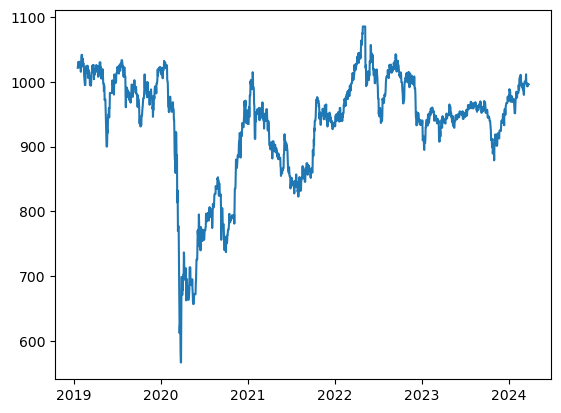

In [10]:
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Target'])

In [11]:
dates = data.pop('Date')

## LSTM

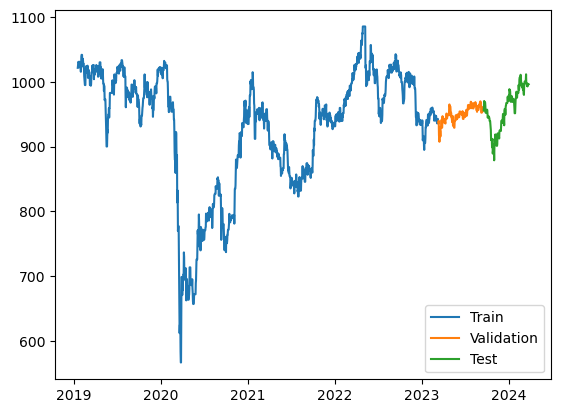

In [12]:
X = data.drop(columns ='Target')
y = data['Target']

q_80 = int(len(X) * .8)
q_90 = int(len(X) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train,y_train)
plt.plot(dates_val,y_val)
plt.plot(dates_test,y_test)
plt.legend(['Train', 'Validation', 'Test'])

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((X_train.shape[1], 1)),
                    layers.LSTM(96),
                    # layers.Dropout(0.2),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])
                    

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 871536.1875 - mean_absolute_error: 928.6849 - val_loss: 887396.9375 - val_mean_absolute_error: 941.8416
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 854977.7500 - mean_absolute_error: 919.9192 - val_loss: 815411.7500 - val_mean_absolute_error: 902.8224
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 751243.8125 - mean_absolute_error: 861.4562 - val_loss: 625109.9375 - val_mean_absolute_error: 790.4488
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 535340.3750 - mean_absolute_error: 724.4188 - val_loss: 332174.5312 - val_mean_absolute_error: 576.1224
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 252192.4219 - mean_absolute_error: 489.2472 - val_loss: 89910.9141 - val_mean_absolute_error: 299.5150
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 57221.7188 - mean_absolute_error: 219.8174 - val_loss: 8682.3018 - val_mean_absolute_error: 92.3167
Epoch 7/100
48/48 ━━━━━━━━

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


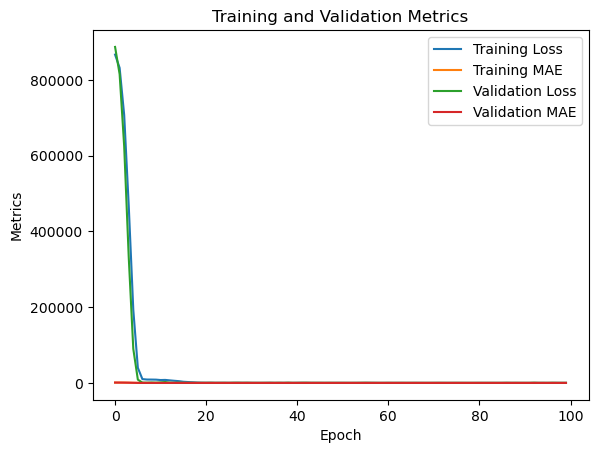

In [14]:
print(history.history.keys())

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')

plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Training and Validation Metrics')
plt.legend()

plt.show()

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
164.06354127387425
0.9816409403629461
9.662657539951454


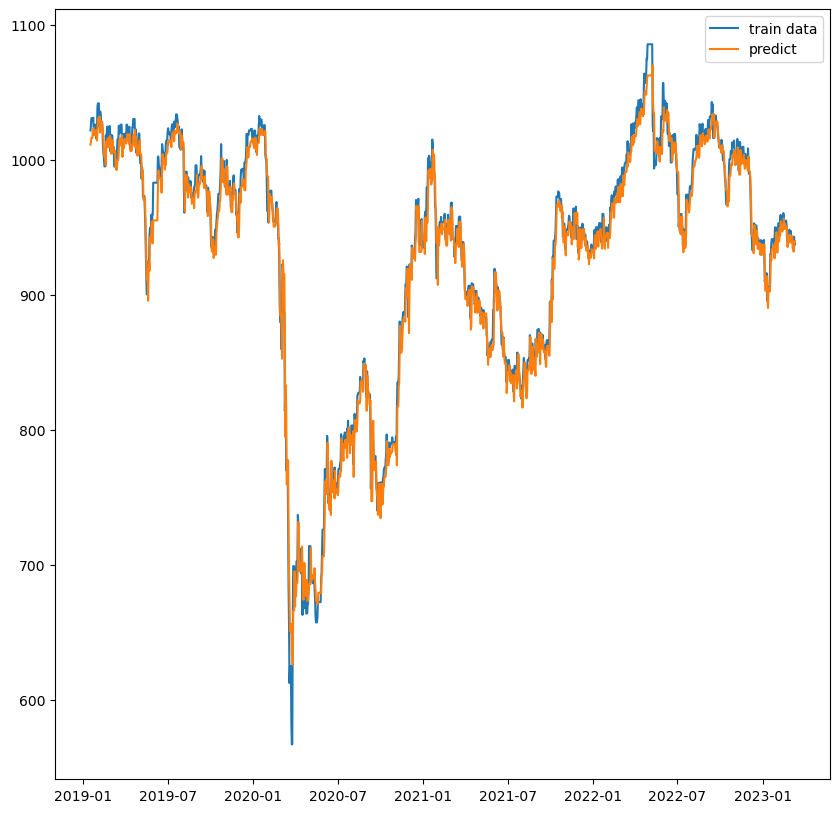

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_predictions = model.predict(X_train).flatten()
plt.figure(figsize=(10,10))
plt.plot(dates_train,y_train)
plt.plot(dates_train,train_predictions)
plt.legend(["train data","predict"])
print(mean_squared_error(y_train,train_predictions))
print(r2_score(y_train,train_predictions))
print(mean_absolute_error(y_train,train_predictions))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
61.34387261431469
0.5666239901036567
6.368521548622536


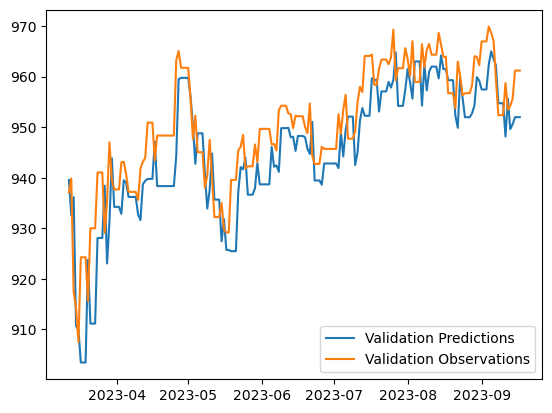

In [16]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])
print(mean_squared_error(y_val,val_predictions))
print(r2_score(y_val,val_predictions))
print(mean_absolute_error(y_val,val_predictions))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE =  6.521092053865129
MSE =  69.95783140370568
R2_score =  0.9335830584881223


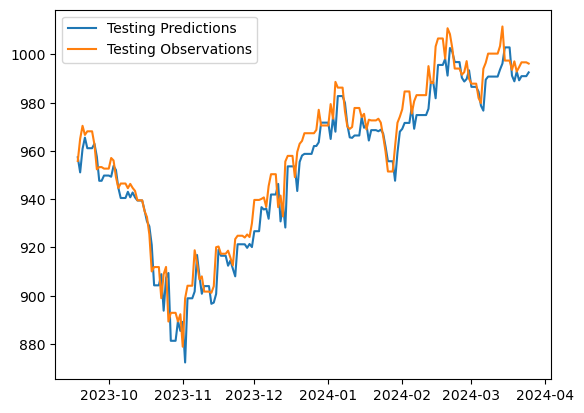

In [17]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])
lstm_MSE =mean_squared_error(y_test,test_predictions)
lstm_r2 = r2_score(y_test,test_predictions)
lstm_MAE = mean_absolute_error(y_test,test_predictions)
print("MAE = ",lstm_MAE)
print("MSE = ",lstm_MSE)
print("R2_score = ",lstm_r2)

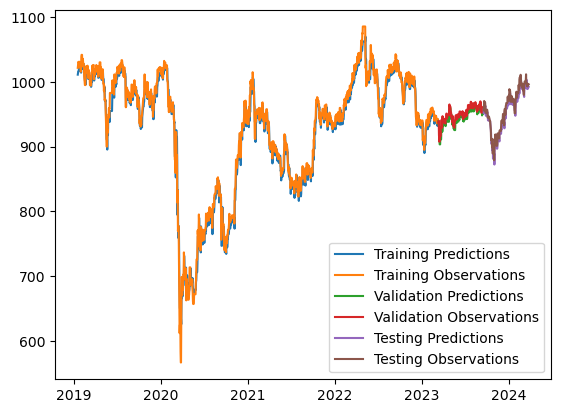

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [20]:
from copy import deepcopy
import numpy as np
recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
    last_window = deepcopy(X_train.iloc[-1].values)
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window[-1] = next_prediction


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

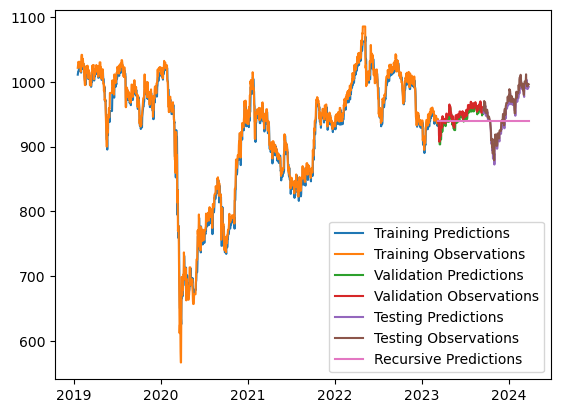

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

### forecasting using LSTM

In [23]:
import datetime
temp = []
forecast_lstm = []
prediction_harga = []
date_forecast = pd.DataFrame(columns=["Date"])
n = data.shape[1]-1
n
X_forecast = pd.DataFrame()
for target in range(data.shape[1]-1,0,-1):
    X_forecast[f'Target-{target}'] = None
price_pred = pd.DataFrame(columns=["Price"])
date_forecast.loc[0] = dates.iloc[-1]
temp.append(data.iloc[-1].values)
for t in range(0,n):
    forecast_lstm.append(temp[0][t])

for i in range(1,30):
    X_forecast.loc[i-1] = forecast_lstm[-n:]
    lstm_pred = model.predict(X_forecast)
    # print(lstm_pred)
    forecast_lstm.append(lstm_pred[i-1][0])
    # print(forecast_lstm)
    price_pred.loc[i-1] = lstm_pred[i-1][0]
    next_date = date_forecast.iloc[0] + datetime.timedelta(days=i)
    date_forecast.loc[i] = next_date
date_forecast = date_forecast[:len(date_forecast)-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [24]:
X_forecast

,Target-10,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1
0,996.560000,1000.350000,1003.480000,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000
1,1000.350000,1003.480000,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,992.575378
2,1003.480000,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,992.575378,988.565674
3,1011.600000,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,992.575378,988.565674,984.714661
4,997.470000,993.600000,997.150000,992.930000,994.770000,996.740000,992.575378,988.565674,984.714661,981.185547
5,993.600000,997.150000,992.930000,994.770000,996.740000,992.575378,988.565674,984.714661,981.185547,977.979492
6,997.150000,992.930000,994.770000,996.740000,992.575378,988.565674,984.714661,981.185547,977.979492,974.919189
7,992.930000,994.770000,996.740000,992.575378,988.565674,984.714661,981.185547,977.979492,974.919189,971.923889
8,994.770000,996.740000,992.575378,988.565674,984.714661,981.185547,977.979492,974.919189,971.923889,968.896240
9,996.740000,992.575378,988.565674,984.714661,981.185547,977.979492,974.919189,971.923889,968.896240,965.735840


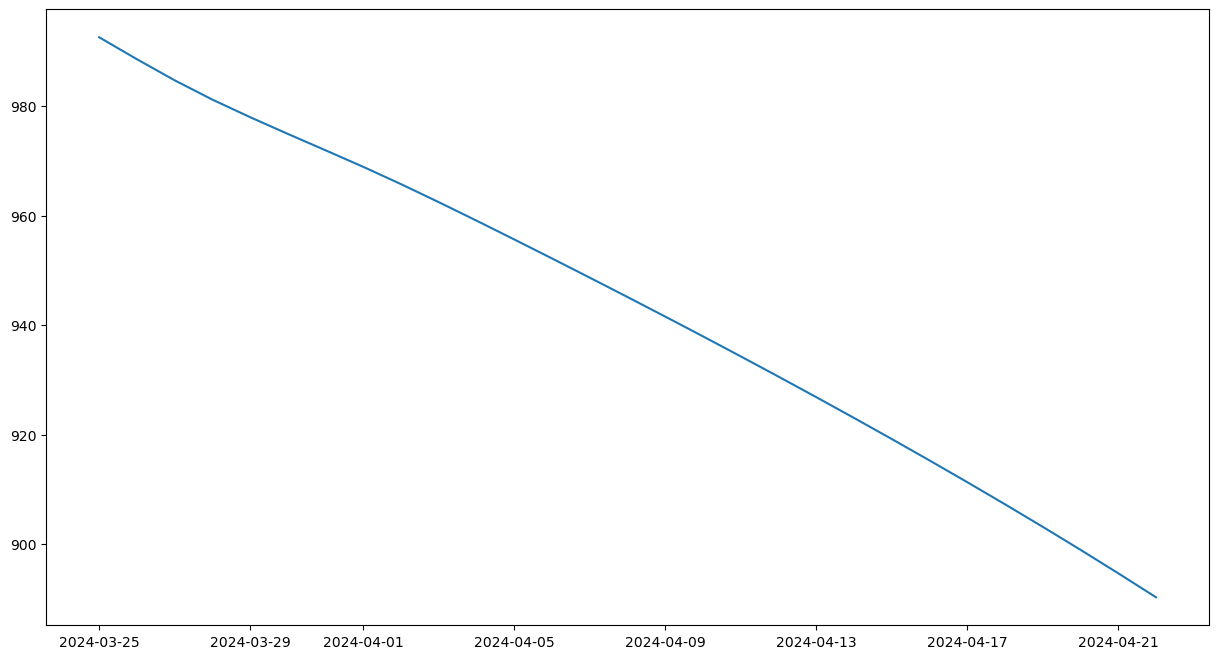

In [25]:
plt.figure(figsize=[15,8])
plt.plot(date_forecast,price_pred)

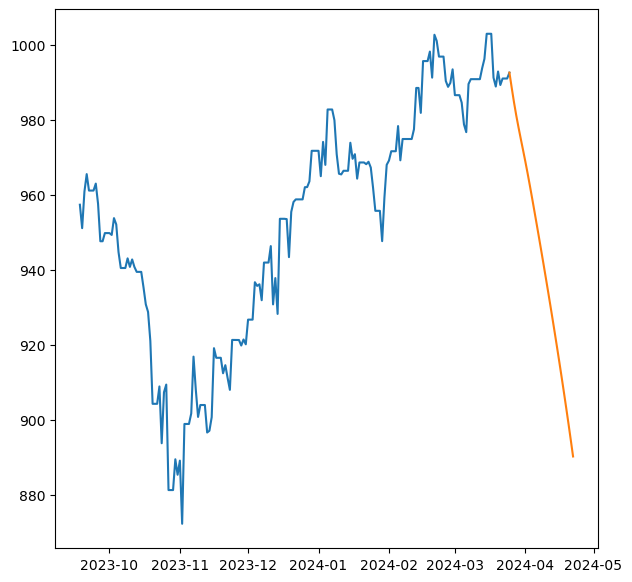

In [26]:
plt.figure(figsize=[7,7])
plt.plot(dates_test,test_predictions)
plt.plot(date_forecast,price_pred)

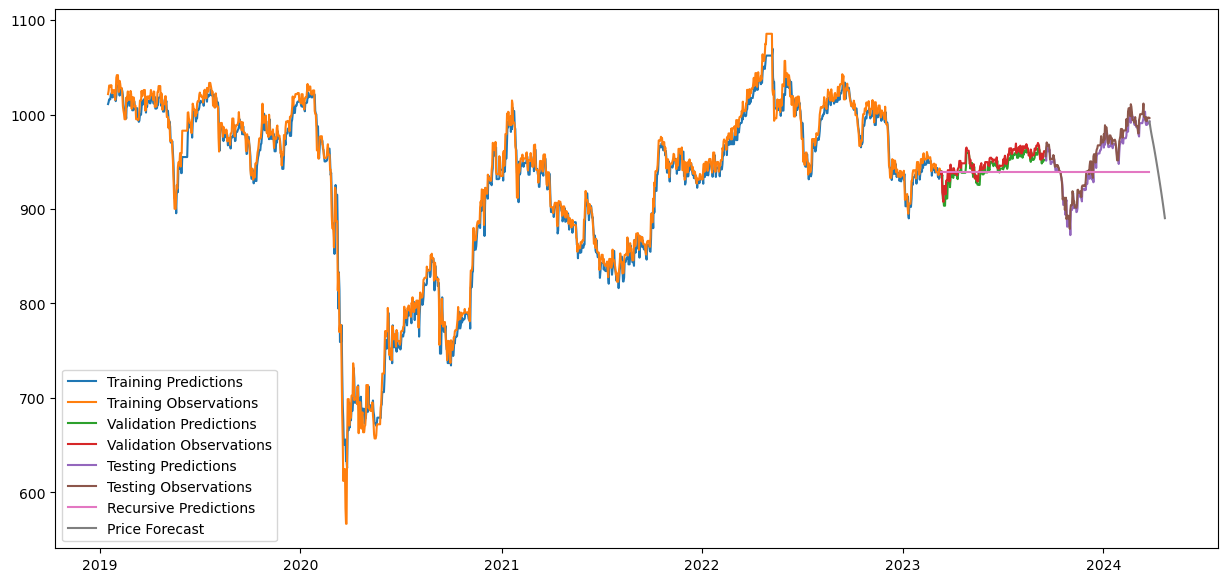

In [27]:
plt.figure(figsize=[15,7])
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.plot(date_forecast,price_pred)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions',"Price Forecast"])